In [9]:
#@title Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn.model_selection as sk
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

In [29]:
raw_data = pd.read_csv("alpha_export_residential.csv")
features = raw_data.copy()
labels = features.pop("complexity")
features.pop("rfi_count")
features.pop("StatVet")
features.head()

,application_type,BuildingType,NumberLevels,ClassifiedUse,BuildingUse,RestrictedWork
0,2,1,0,3,2,0
1,5,1,0,3,1,0
2,2,1,0,5,2,1
3,2,1,0,5,2,1
4,2,1,0,5,2,1


In [20]:
x_train, x_test, y_train, y_test = sk.train_test_split(features, labels, test_size=0.2, random_state = 42)

In [18]:
#@title Define the plotting function
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


In [22]:
def create_model(my_learning_rate):
  """Create and compile a deep neural net."""
  
  # All models in this course are sequential.
  model = tf.keras.models.Sequential()

  # Define the first hidden layer.   
  model.add(tf.keras.layers.Dense(units=8, activation='relu'))

  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(rate=0.2))

  # Define the output layer. The units parameter is set to 3 because
  # the model must choose among 3 possible output values (representing
  # R1, R2, R3 inclusive).
  #
  # Don't change this layer.
  model.add(tf.keras.layers.Dense(units=4, activation='softmax'))     
                           
  # Construct the layers into a model that TensorFlow can execute.  
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
 
  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch. 
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist

Epoch 1/50
22/22 [==============================] - 0s 7ms/step - loss: 1.7255 - accuracy: 0.1995 - val_loss: 1.3833 - val_accuracy: 0.4007
Epoch 2/50
22/22 [==============================] - 0s 4ms/step - loss: 1.3071 - accuracy: 0.4559 - val_loss: 1.1520 - val_accuracy: 0.5066
Epoch 3/50
22/22 [==============================] - 0s 3ms/step - loss: 1.1529 - accuracy: 0.4932 - val_loss: 1.0531 - val_accuracy: 0.5236
Epoch 4/50
22/22 [==============================] - 0s 3ms/step - loss: 1.0710 - accuracy: 0.5139 - val_loss: 0.9819 - val_accuracy: 0.5801
Epoch 5/50
22/22 [==============================] - 0s 3ms/step - loss: 1.0173 - accuracy: 0.5546 - val_loss: 0.9310 - val_accuracy: 0.6250
Epoch 6/50
22/22 [==============================] - 0s 3ms/step - loss: 0.9706 - accuracy: 0.5675 - val_loss: 0.8955 - val_accuracy: 0.6226
Epoch 7/50
22/22 [==============================] - 0s 3ms/step - loss: 0.9414 - accuracy: 0.5770 - val_loss: 0.8710 - val_accuracy: 0.6235
Epoch 8/50
22/22 [==

[0.7727383971214294, 0.6665560007095337]

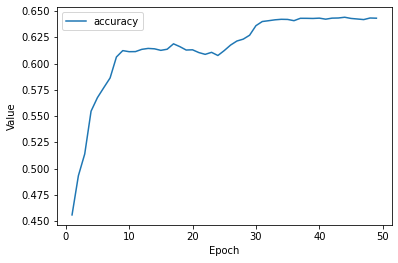

In [30]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, x_train, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test, y=y_test, batch_size=batch_size)

In [28]:
# make a prediction from the trained model
#data = np.expand_dims(x_test[216], 0)
result = my_model.predict(x_test[16])
print(pd.DataFrame(result))

KeyError: 16